# Global ordering evolution

Theory by Ramaswamy (Simha 2002) envisioned a flock of self-propelled particles (SPPs) which exhibits instability. This instability was believed to be the explanation for the "active turbulence" phenomenon, commonly seen in active matter systems. Inspired by their picture, I'm going to measure the ordering evolution during the emergence of active turbulence in _E. coli_ suspensions. If they got the right picture, I should be able to identify a short period where global ordering is strong at early stage, followed by a decrease when instability takes place. This measurement will help me gain insight into the cause of active turbulence. 

## <font color='blue'> Plans

<font color='blue'>
    
- ...
    
</font>

## 0 Packages

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from corrLib import *
from corr_utils import *
import typesetting.main as tm
tm.prl('1-column-2-panel')
from scipy.optimize import curve_fit

## 1 Compute global ordering

An intuitive measure of global ordering is to compare all the directors with the mean orientation. This idea can be formalized as the following:
$$
\phi = \langle \overrightarrow{n} \cdot \langle \overrightarrow{n} \rangle\rangle
$$

In [15]:
X, Y, U, V = read_piv(r'D:\density_fluctuations\08032020\piv_imseq\01\0300-0301.csv')

In [16]:
# mean orientation
norm = (U ** 2 + V ** 2) ** 0.5
Un = U / norm
Vn = V / norm

mean_direction = (Un.mean(), Vn.mean())

In [17]:
# compare all directors with mean direction
inner_prod = (Un * mean_direction[0] + Vn * mean_direction[1]).mean()
inner_prod

0.27911788421639705

In [18]:
def global_ordering(U, V):
    """
    Compute global ordering of 2-D velocity field
    
    Args:
    U, V -- velocity components
    
    Returns:
    order -- order parameter between -1 and 1
    """
    norm = (U ** 2 + V ** 2) ** 0.5
    Un = U / norm
    Vn = V / norm
    
    order = (Un * mean_direction[0] + Vn * mean_direction[1]).mean()
    
    return order

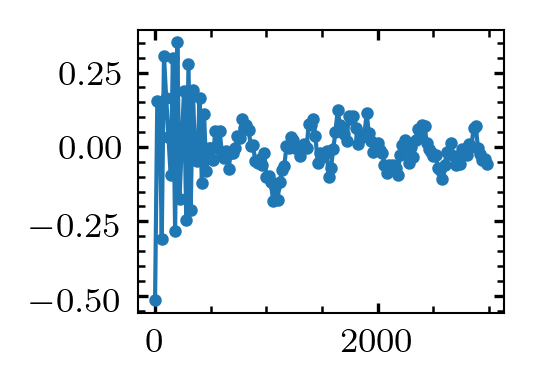

In [64]:
order_list = []
frames = range(0, 3000, 20)
for i in frames:    
    X, Y, U, V = read_piv(r'D:\density_fluctuations\08032020\piv_imseq\01\{0:04d}-{1:04d}.csv'.format(i, i+1))
    order = global_ordering(U, V)
    order_list.append(order)
plt.figure(dpi=300)
plt.plot(frames, order_list, marker='o', markersize=2, lw=1)

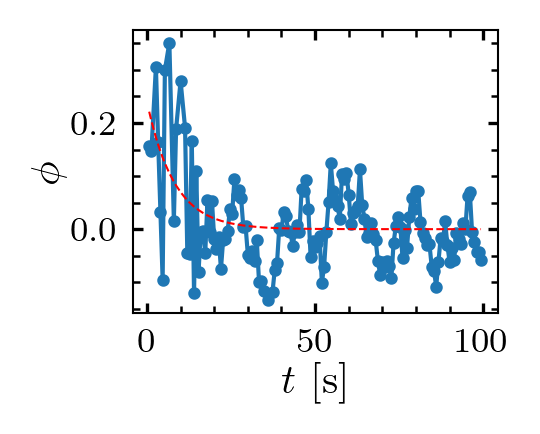

In [67]:
# postprocess the global ordering data
x = np.array(frames) 
y = np.array(order_list) 
xx = x[y>-0.15] / 30
yy = y[y>-0.15] 
plt.figure(dpi=300)
plt.plot(xx, yy, marker='o', markersize=2, lw=1)
plt.xlabel('$t$ [s]')
plt.ylabel('$\phi$')

plt.plot(xx, exp(xx, *popt), ls='--', lw=0.5, color='red')

$$
0.3e^{-0.15t}
$$

In [60]:
# exponential fitting
def exp(x, a, b):
    return a * np.exp(-b*x)

In [66]:
popt, a = curve_fit(exp, xx, yy)

In [68]:
popt

array([0.24031829, 0.12362834])

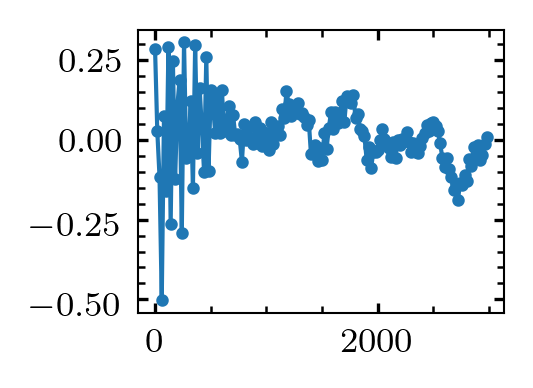

In [69]:
order_list = []
frames = range(0, 3000, 20)
for i in frames:    
    X, Y, U, V = read_piv(r'D:\density_fluctuations\08032020\piv_imseq\04\{0:04d}-{1:04d}.csv'.format(i, i+1))
    order = global_ordering(U, V)
    order_list.append(order)
plt.figure(dpi=300)
plt.plot(frames, order_list, marker='o', markersize=2, lw=1)